In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt 


dfCaudal = pd.read_excel(r'caudal.xlsx')
dfCaudal = pd.DataFrame(dfCaudal, columns=['Tempo', 'Caudal'])

dfCaudal.head()

,Tempo,Caudal
0,2020-01-01 23:26:58,4.39
1,2020-01-02 00:26:58,3.9
2,2020-01-02 01:26:58,3.6
3,2020-01-02 02:26:58,3.3
4,2020-01-02 03:26:54,3.3


In [282]:
dfInterv = pd.read_excel(r'ordens.xlsx', sheet_name="Intervenções")
dfInterv.drop(dfInterv.columns[[2, 3, 5, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18,19,20,22, 23, 24, 25]], inplace=True, axis=1)
dfInterv.rename( columns = {
    'INTERVENÇÕES': 'intervencao',
    'Unnamed: 1': 'data',
    'Unnamed: 4': 'dataexecucao',
    'Unnamed: 6': 'duracao',
    'Unnamed: 11': 'sintoma',
    'Unnamed: 21': 'zmc',
}, inplace=True)
dfInterv = dfInterv.iloc[1:, :]
dfInterv = dfInterv[dfInterv.zmc == 'ZMC de Bolho']
dfInterv = dfInterv[dfInterv.sintoma.str.contains('Fuga')]
dfInterv['data'] = pd.to_datetime(dfInterv['data'])
dfInterv['dataexecucao'] = pd.to_datetime(dfInterv['dataexecucao'])
# TODO
# avaliar diferenca de todas 
# avaliar apenas aquelas q sao fugas no ramal

dfInterv.head(20)

,intervencao,data,dataexecucao,duracao,sintoma,zmc
64,IN_22_AB_03260,2022-08-29 07:45:00,2022-08-29 15:43:40,00:42:12,Abastecimento » Contador » Fuga no Ramal,ZMC de Bolho
98,IN_22_AB_02934,2022-08-08 07:45:00,2022-08-08 16:03:02,01:07:34,Abastecimento » Contador » Fuga no Ramal,ZMC de Bolho
148,IN_22_AB_02372,2022-07-01 07:45:00,2022-07-01 14:02:27,00:01:55,Abastecimento » Contador » Fuga no Ramal,ZMC de Bolho
155,IN_22_AB_02280,2022-06-27 08:00:00,2022-06-27 15:57:53,00:04:00,Abastecimento » Contador » Fuga no Ramal,ZMC de Bolho
199,IN_22_AB_01782,2022-05-20 07:45:00,2022-05-20 15:02:49,01:10:29,Abastecimento » Contador » Fuga no Ramal,ZMC de Bolho


In [365]:
def plotCaudal(interZmc):
    timeDeltaAntes = 4
    timeDeltaDepois = 4
    dfCaudal['Caudal'] = pd.to_numeric(dfCaudal['Caudal'], errors='coerce')
    dfCaudalAposFalha = dfCaudal[dfCaudal['Tempo'] > (interZmc.data - timedelta(hours = timeDeltaAntes))]
    dfCaudalAteExecucao= dfCaudalAposFalha[dfCaudalAposFalha['Tempo'] < (interZmc.dataexecucao + timedelta(hours = timeDeltaDepois))]

    dfCaudalAteExecucao = dfCaudalAteExecucao[dfCaudalAteExecucao['Caudal'] > 0]
    dfCaudalAteExecucao.hora = dfCaudalAteExecucao.Tempo.dt.hour
    #interZmc.dataexecucao = interZmc.dataexecucao.hour
    #interZmc.hora = interZmc.data.hour
    
    #plt.axvline(x = interZmc.dataexecucao, color = 'r', label=f'{interZmc.intervencao}')
    #plt.axvline(x = interZmc.hora, color = 'b', label=f'{interZmc.intervencao}')
    plt.plot(dfCaudalAteExecucao.hora, dfCaudalAteExecucao.Caudal, label=f'{interZmc.intervencao} {interZmc.sintoma}' )




C:\Users\Francisco\AppData\Local\Temp\ipykernel_19372\3043537493.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dfCaudalAteExecucao.hora = dfCaudalAteExecucao.Tempo.dt.hour


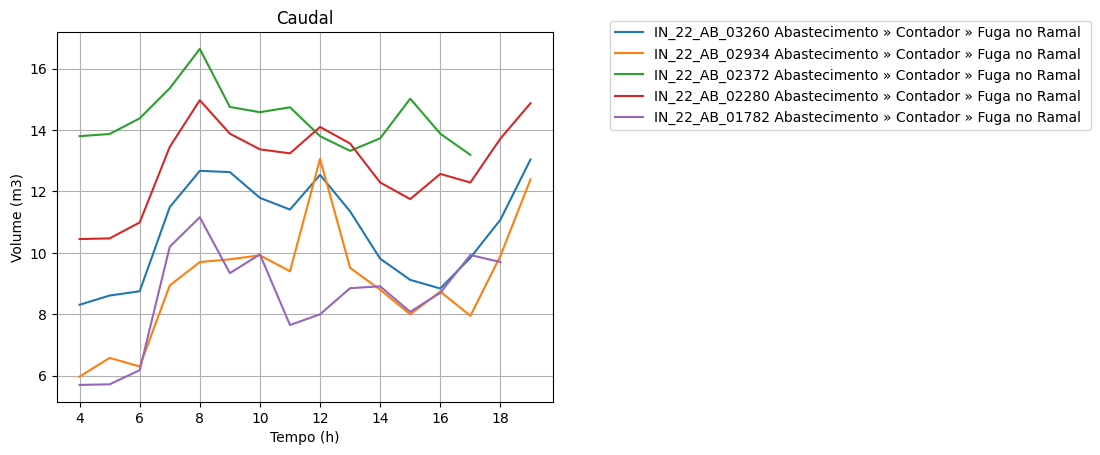

In [366]:
plt.title('Caudal')
for i in range(0, len(dfInterv)):
  plotCaudal(dfInterv.iloc[i])
leg = plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.ylabel('Volume (m3)')
plt.xlabel('Tempo (h)')
plt.grid(True)



In [ ]:
plt.